In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer, FunctionTransformer, QuantileTransformer, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [2]:
sales_raw = pd.read_csv('./data/kc_house_data.csv')
sales_raw.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
sales_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
kc_data = pd.read_csv('./data/kc_house_data.csv')


X, y = kc_data.drop('price', axis=1), kc_data['price']

X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

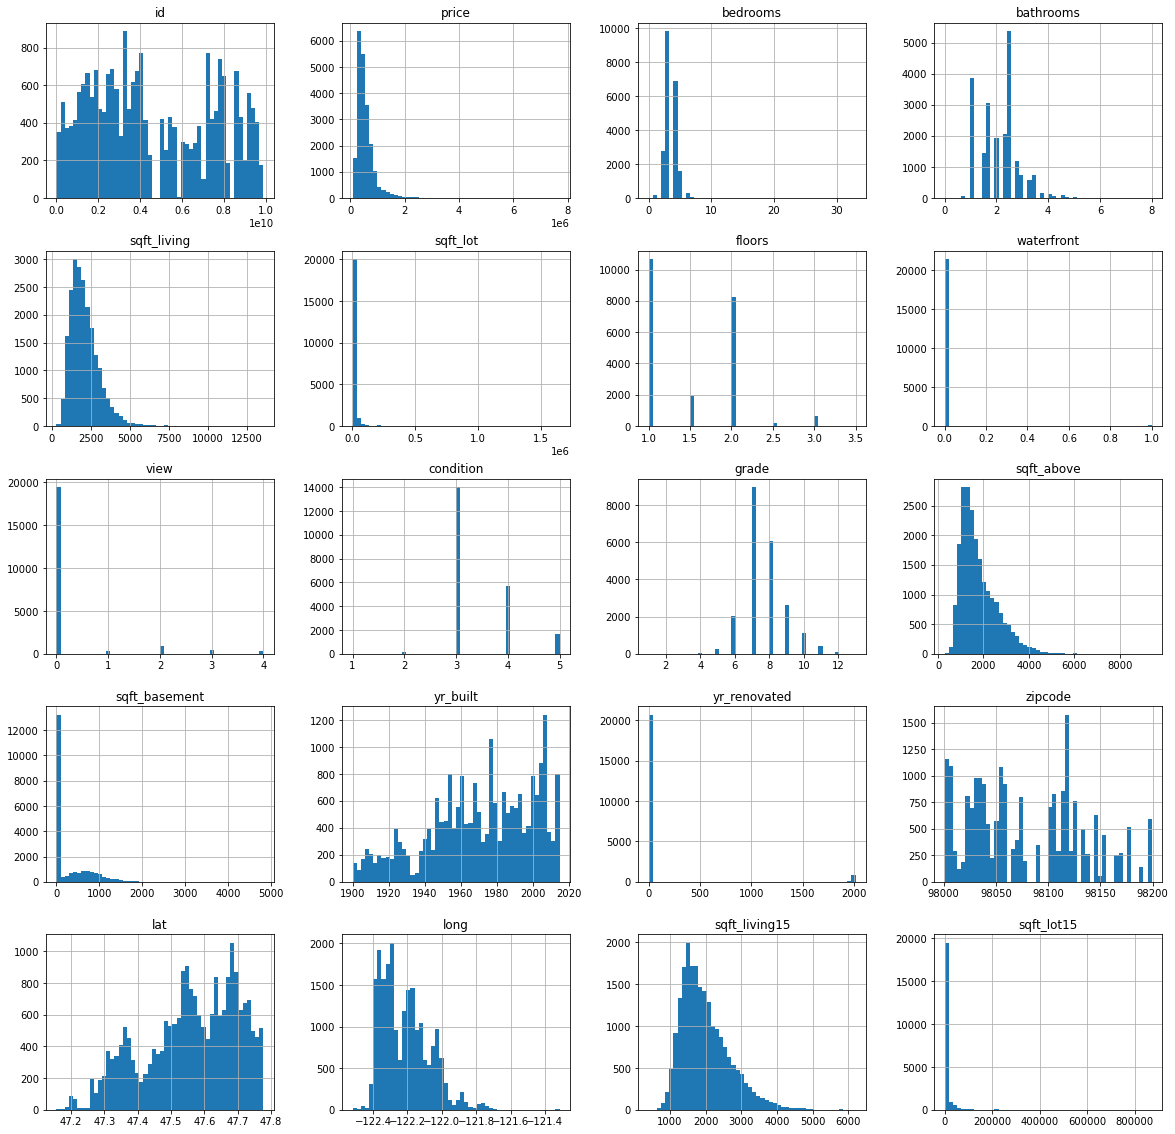

In [4]:
sales_raw.hist(bins=50, figsize=(20,20));

In [ ]:
def sqft_diff()

In [ ]:
def distance_from_space_needle(lat, long):
    """return 'as the crow flies' distance in miles from the 
    space needle, given latitude and longitude coordinates of a location"""
    # Convert lat/longitudes to radians
    def to_radians(latlong):
        return latlong / 57.29577951
    # lat/long of space needle
    space_lat = to_radians(47.6205)
    space_long = to_radians(-122.3493)
    # lat/long of input
    loc_lat = to_radians(lat)
    loc_long = to_radians(long)
    # distance in miles
    d = 3963.0 * np.arccos((np.sin(space_lat) * np.sin(loc_lat))\
                            + np.cos(space_lat) * np.cos(loc_lat)\
                            * np.cos(loc_long - space_long))
    return d

In [17]:
X, y = sales_raw.drop('price', axis=1), sales_raw['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)


In [19]:
X_train

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1571,934300140,20150323T000000,4,1.50,2000,6778,1.0,0,0,4,7,1170,830,1962,0,98198,47.3708,-122.311,1940,7531
16330,9238430680,20140521T000000,4,2.50,2630,48706,2.0,0,0,3,8,2630,0,1986,0,98072,47.7750,-122.125,2680,48706
12786,191100870,20140805T000000,4,2.50,2620,9525,2.5,0,0,4,9,2620,0,1974,0,98040,47.5631,-122.219,2580,9525
12524,2025701530,20140826T000000,3,2.50,1610,6000,2.0,0,0,4,7,1610,0,1993,0,98038,47.3490,-122.036,1570,6000
16179,4059400585,20140624T000000,3,1.00,880,18205,1.0,0,0,4,6,880,0,1945,0,98178,47.5013,-122.244,1110,16115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,7855801670,20150401T000000,4,3.25,5180,19850,2.0,0,3,3,12,3540,1640,2006,0,98006,47.5620,-122.162,3160,9750
866,3955900830,20150427T000000,3,2.50,3460,6590,2.0,0,0,3,7,3460,0,2001,0,98056,47.4802,-122.188,2490,6312
74,3444100400,20150316T000000,3,1.75,1790,50529,1.0,0,0,5,7,1090,700,1965,0,98042,47.3511,-122.073,1940,50529
14512,6933600540,20140820T000000,2,1.00,820,5040,1.0,0,0,3,7,820,0,1953,0,98199,47.6498,-122.388,1730,5760


In [20]:
correlations = sales_raw.corr()
correlations['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

In [23]:
X_train.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [216]:
def to_yr_sold(date):
    return pd.to_datetime(date).year

date_transformer = FunctionTransformer(to_yr_sold)

date_transformer.fit_transform(X_train['date'].values)

Int64Index([2015, 2014, 2014, 2014, 2014, 2014, 2015, 2014, 2014, 2014,
            ...
            2014, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2014, 2014],
           dtype='int64', length=17290)

In [218]:
date_transformer.get_f

{'accept_sparse': False,
 'check_inverse': True,
 'func': <function __main__.to_yr_sold(date)>,
 'inv_kw_args': None,
 'inverse_func': None,
 'kw_args': None,
 'validate': False}

In [222]:
date_idx = 1

class YearAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        super().__init__()
    def fit(self, X, y=None):
        # TODO: think this is the best place to put get_feature_names
        return self
    def transform(self, X):
        yr_sold = pd.to_datetime(X[:,date_idx]).year
        return np.c_[X, yr_sold]
#     def get_feature_names(self):
#         return list(X.columns).append('yr_sold')

    
YearAdder().fit_transform(np.array(X_train))

array([[934300140, '20150323T000000', 4, ..., 1940, 7531, 2015],
       [9238430680, '20140521T000000', 4, ..., 2680, 48706, 2014],
       [191100870, '20140805T000000', 4, ..., 2580, 9525, 2014],
       ...,
       [3444100400, '20150316T000000', 3, ..., 1940, 50529, 2015],
       [6933600540, '20140820T000000', 2, ..., 1730, 5760, 2014],
       [405100295, '20140826T000000', 3, ..., 1740, 8000, 2014]],
      dtype=object)

In [200]:
X_train.iloc[0,:]

id                     934300140
date             20150323T000000
bedrooms                       4
bathrooms                    1.5
sqft_living                 2000
sqft_lot                    6778
floors                         1
waterfront                     0
view                           0
condition                      4
grade                          7
sqft_above                  1170
sqft_basement                830
yr_built                    1962
yr_renovated                   0
zipcode                    98198
lat                      47.3708
long                    -122.311
sqft_living15               1940
sqft_lot15                  7531
Name: 1571, dtype: object

In [204]:
# column indices
bedrooms_idx, sqft_living_idx, yr_sold_idx, yr_built_idx, yr_renovated_idx = 0, 4, -1, 13, 14

# add attributes, a custom sklearn transformer needs init, fit, and transform methods
# fit_transform is created by adding TransformerMixin and BaseEstimator gives get/
# set_params()
class FeatureAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_sqft_per_bedroom = True):
        self.add_sqft_per_bedroom = add_sqft_per_bedroom
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        # Subtract the larger of yr_built or yr_renovated from yr_sold,
        # if this is negative (yr_reno after yr_sold) return 0
        effective_age_guess = X[:, yr_sold_idx] - np.maximum(X[:, yr_renovated_idx], X[:, yr_built_idx])
        effective_age = np.maximum(effective_age_guess, 0)
        if self.add_sqft_per_bedroom:
            sqft_per_bedroom = X[:, sqft_living_idx] / X[:, bedrooms_idx]
            return np.c_[X, effective_age, sqft_per_bedroom]
        else:
            return np.c_[X, effective_age]
        
def drop_columns(X):
    # drop id, date, yr_renovated, zipcode
    return X[:,[0, *range(3, 14), *range(16, 23)]]



In [205]:
X_train[X_train.bedrooms == 0]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
14423,9543000205,20150413T000000,0,0.00,844,4269,1.0,0,0,4,7,844,0,1913,0,98001,47.2781,-122.250,1380,9600
9854,7849202190,20141223T000000,0,0.00,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
18379,1222029077,20141029T000000,0,0.75,384,213444,1.0,0,0,3,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341
9773,3374500520,20150429T000000,0,0.00,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
6994,2954400190,20140624T000000,0,0.00,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
12653,7849202299,20150218T000000,0,2.50,1490,7111,2.0,0,0,3,7,1490,0,1999,0,98065,47.5261,-121.826,1500,4675
3467,1453602309,20140805T000000,0,1.50,1430,1650,3.0,0,0,3,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
4868,6896300380,20141002T000000,0,1.00,390,5900,1.0,0,0,2,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000


In [189]:
# Need this step in order to compute sqft_per_bedroom without dividing by zero,
# there are only about ten instances of zero bedrooms since the dataset is single-family
# home sales

BedroomImputer = SimpleImputer(missing_values=0, strategy='constant', fill_value=1)
bedroom_pipe = ColumnTransformer([
    ('bedroom_imputer', BedroomImputer, [2]),
], remainder='passthrough')

In [209]:
features_pipe = Pipeline([
    ('yr_sold_adder', DateAdder()),
    ('bedroom_pipe', bedroom_pipe),
    ('feature_adder', FeatureAdder()),
    ('column_dropper', FunctionTransformer(drop_columns)),
    
])



test_res = features_pipe.fit_transform(np.array(X_train))

In [212]:
features_pipe.named_steps['yr_sold_adder']

DateAdder()

In [215]:
DateAdder._get_param_names()

[]

In [182]:
X_train.values

array([[934300140, '20150323T000000', 4, ..., -122.311, 1940, 7531],
       [9238430680, '20140521T000000', 4, ..., -122.125, 2680, 48706],
       [191100870, '20140805T000000', 4, ..., -122.219, 2580, 9525],
       ...,
       [3444100400, '20150316T000000', 3, ..., -122.073, 1940, 50529],
       [6933600540, '20140820T000000', 2, ..., -122.38799999999999, 1730,
        5760],
       [405100295, '20140826T000000', 3, ..., -122.354, 1740, 8000]],
      dtype=object)

In [207]:
X_train.iloc[0, :]

id                     934300140
date             20150323T000000
bedrooms                       4
bathrooms                    1.5
sqft_living                 2000
sqft_lot                    6778
floors                         1
waterfront                     0
view                           0
condition                      4
grade                          7
sqft_above                  1170
sqft_basement                830
yr_built                    1962
yr_renovated                   0
zipcode                    98198
lat                      47.3708
long                    -122.311
sqft_living15               1940
sqft_lot15                  7531
Name: 1571, dtype: object

In [306]:
test_res[0].astype('float64')

array([ 4.00000e+00,  1.50000e+00,  2.00000e+03,  6.77800e+03,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  4.00000e+00,
        7.00000e+00,  1.17000e+03,  8.30000e+02,  1.96200e+03,
        4.73708e+01, -1.22311e+02,  1.94000e+03,  7.53100e+03,
        2.01500e+03,  5.30000e+01,  5.00000e+02])

In [146]:
# all but first two columns (id, date) of original X_train
features = list(X_train.columns[2:])
features

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [229]:
features = list(X_train.columns[2:])
features.remove('zipcode')
features.remove('yr_renovated')

features += ['yr_sold', 'effective_age', 'sqft_per_bedroom']

In [230]:
features

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'yr_sold',
 'effective_age',
 'sqft_per_bedroom']

In [366]:

cat_indices = [*range(5,9)]


num_indices = [x for x, _ in enumerate(features) if x not in cat_indices]
cat_indices.remove(5)

print(cat_indices)
num_indices

[6, 7, 8]


[0, 1, 2, 3, 4, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [367]:
def positive_gate(array):
    return np.abs(array) + 1

In [368]:
# preprocessing steps

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', QuantileTransformer(output_distribution='normal'))
])



cat_pipeline = Pipeline([
    ('one_hot', OneHotEncoder())
])


# Waterfront has only 0 and 1 so is effectively already one-hotted (only column in 'passthrough')
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_indices),
    ('waterfront', 'passthrough', [5]),
    ('cat', cat_pipeline, cat_indices)
    ])

In [ ]:
num_pipeline2 = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

In [332]:
num_test = ColumnTransformer([
    ('num', num_pipeline, num_indices),
])

num_prep = num_test.fit_transform(test_res)

In [333]:
num_prep[0]

array([ 0.67843252, -0.78845531,  0.09801306, -0.25137441, -5.19933758,
       -5.19933758,  0.81265408, -0.47802469, -0.72334253,  1.06188413,
       -0.32822342, -1.079065  , -0.51922535,  0.14731565, -0.03543281,
        5.19933758])

In [369]:
prepared = preprocessor.fit_transform(test_res)

(array([1.000e+00, 0.000e+00, 2.000e+00, 1.400e+01, 6.800e+01, 2.520e+02,
        6.690e+02, 1.575e+03, 2.679e+03, 3.400e+03, 3.392e+03, 2.659e+03,
        1.554e+03, 7.010e+02, 2.440e+02, 6.900e+01, 1.000e+01, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-5.19933758e+00, -4.67940382e+00, -4.15947007e+00, -3.63953631e+00,
        -3.11960255e+00, -2.59966879e+00, -2.07973503e+00, -1.55980127e+00,
        -1.03986752e+00, -5.19933758e-01,  4.89217555e-11,  5.19933758e-01,
         1.03986752e+00,  1.55980127e+00,  2.07973503e+00,  2.59966879e+00,
         3.11960255e+00,  3.63953631e+00,  4.15947007e+00,  4.67940382e+00,
         5.19933758e+00]),
 <BarContainer object of 20 artists>)

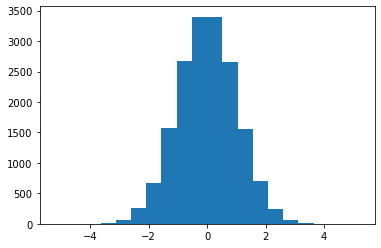

In [370]:
plt.hist(num_prep[:, 8], bins=20)

(array([1.000e+00, 0.000e+00, 1.000e+00, 1.000e+01, 7.000e+01, 2.420e+02,
        7.010e+02, 1.555e+03, 2.632e+03, 3.432e+03, 3.433e+03, 2.634e+03,
        1.555e+03, 6.990e+02, 2.440e+02, 6.500e+01, 1.100e+01, 3.000e+00,
        0.000e+00, 2.000e+00]),
 array([-5.199337582605575, -4.679403824340126, -4.159470066074675,
        -3.6395363078092258, -3.1196025495437762, -2.5996687912783267,
        -2.0797350330128768, -1.5598012747474268, -1.0398675164819773,
        -0.5199337582165278, 4.89217555355026e-11, 0.5199337583143722,
        1.0398675165798217, 1.5598012748452712, 2.0797350331107216,
        2.599668791376171, 3.1196025496416206, 3.639536307907071,
        4.15947006617252, 4.67940382443797, 5.19933758270342], dtype=object),
 <BarContainer object of 20 artists>)

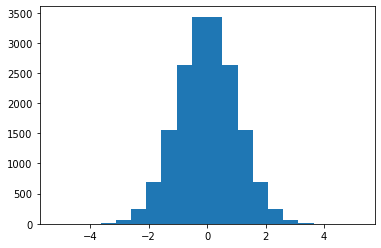

In [371]:
plt.hist(prepared[:, 8], bins=20)

In [372]:
cat_features = ['waterfront'] + list(preprocessor.transformers_[2][1]['one_hot']\
                   .get_feature_names(features[6:9]))
cat_features

['waterfront',
 'view_0',
 'view_1',
 'view_2',
 'view_3',
 'view_4',
 'condition_1',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_3',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'grade_10',
 'grade_11',
 'grade_12',
 'grade_13']

In [373]:
num_features = [features[idx] for idx in num_indices]
num_features

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'yr_sold',
 'effective_age',
 'sqft_per_bedroom']

In [374]:
num_indices

[0, 1, 2, 3, 4, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [375]:
features_prepared = num_features + cat_features

In [376]:
features_prepared

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'yr_sold',
 'effective_age',
 'sqft_per_bedroom',
 'waterfront',
 'view_0',
 'view_1',
 'view_2',
 'view_3',
 'view_4',
 'condition_1',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_3',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'grade_10',
 'grade_11',
 'grade_12',
 'grade_13']

In [377]:
prepared[0]

array([0.6784325172268452, -0.7884553079874755, 0.09801306125907777,
       -0.2513744084629201, -5.199337582605575, -0.7233425303259227,
       1.0618841348770716, -0.32822341801540295, -1.0790649959809744,
       -0.5192253494916858, 0.14731564676985873, -0.03543281164873538,
       5.19933758270342, 0.436239926210473, -0.4626104126272192, 0, 1.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], dtype=object)

In [258]:
X_train.condition.value_counts().sort_index()

1       25
2      140
3    11270
4     4507
5     1348
Name: condition, dtype: int64

In [349]:
lin_reg = LinearRegression()
lin_reg.fit(prepared, y_train)

LinearRegression()

In [350]:
lin_predictions = lin_reg.predict(prepared)
lin_predictions

array([395763.69775391, 658138.87365723, 752325.69226074, ...,
       348503.8380127 , 280791.75073242, 487595.26574707])

In [351]:
lin_rmse = mean_squared_error(y_train, lin_predictions, squared=False)
lin_rmse

204195.10371348617

In [352]:
lin_mae = mean_absolute_error(y_train, lin_predictions)
lin_mae

125392.12360649926

In [353]:
tree_reg = DecisionTreeRegressor(random_state=13)
tree_reg.fit(prepared, y_train)

DecisionTreeRegressor(random_state=13)

In [354]:
tree_predictions = tree_reg.predict(prepared)
tree_predictions

array([284950., 625000., 838400., ..., 349000., 508000., 265000.])

In [355]:
tree_rmse = mean_squared_error(y_train, tree_predictions, squared=False)
tree_rmse

3444.313096687119

In [356]:
tree_mae = mean_absolute_error(y_train, tree_predictions)
tree_mae

144.40306535569692

In [357]:
neg_tree_scores = cross_val_score(tree_reg, prepared, y_train,
                        scoring='neg_mean_absolute_error', cv=10)
tree_scores = -neg_tree_scores
print(tree_scores)
print(tree_scores.mean())
print(tree_scores.std())


[107129.70734529  96034.48582996 100221.97339503 104295.50896472
 104532.50665124 101062.51706189  97589.72238288 102227.02949682
 101181.97050318 104216.05147484]
101849.14731058414
3201.2348099515143


In [358]:
neg_lin_scores = cross_val_score(lin_reg, prepared, y_train,
                        scoring='neg_mean_absolute_error', cv=10)
lin_scores = -neg_lin_scores
print(lin_scores)
print(lin_scores.mean())
print(lin_scores.std())

[132360.17683632 126705.61444477 123277.49396327 128071.60023858
 126675.2060801  124088.11176981 120704.85280509 128656.2332273
 125250.83082707 122404.23742047]
125819.43576127819
3240.731629837507


In [409]:
forest_reg = RandomForestRegressor(random_state=13)
forest_reg.fit(prepared, y_train)
forest_predictions = forest_reg.predict(prepared)
forest_predictions

array([280713.  , 622411.76, 871311.88, ..., 349523.86, 499150.  ,
       296734.5 ])

In [379]:
neg_forest_scores = cross_val_score(forest_reg, prepared, y_train,
                               scoring='neg_mean_absolute_error', cv=10)

forest_scores = -neg_forest_scores
print(forest_scores)
print(forest_scores.mean())
print(forest_scores.std())

[75575.96857391 68515.15634333 72372.32976682 72672.73753835
 73974.36468396 70402.54110227 67617.4330416  71230.49250246
 71659.99478834 71743.47817752]
71576.44965185766
2239.628888629237


### Testing A Quick Hunch: Large Errors are Skewing the Overall Results
(This looks to be the case, as the median absolute errors are much smaller than the mean absolute errors, and the variance in these scores is also much smaller)

In [380]:
neg_forest_scores = cross_val_score(forest_reg, prepared, y_train,
                               scoring='neg_median_absolute_error', cv=10)

forest_scores = -neg_forest_scores
print(forest_scores)
print(forest_scores.mean())
print(forest_scores.std())

[42036.02 36294.92 40147.18 38916.25 39217.5  40575.82 39020.72 38672.3
 41074.95 37640.  ]
39359.566000000006
1592.4315750273258


In [381]:
forest_reg.feature_importances_

array([1.70691835e-03, 6.48647476e-03, 5.35355472e-01, 1.42810108e-02,
       1.69033064e-03, 2.16952119e-02, 5.49540579e-03, 9.13294955e-03,
       1.83585872e-01, 7.77655196e-02, 4.29058970e-02, 1.53187745e-02,
       1.89832969e-03, 7.88786000e-03, 1.08664251e-02, 2.32154457e-02,
       4.25593269e-03, 3.91466342e-04, 6.82565965e-04, 9.81745872e-04,
       7.19942360e-03, 1.06409452e-04, 2.05770167e-04, 1.08678915e-03,
       7.13323740e-04, 9.79257757e-04, 3.09350962e-07, 6.46487383e-06,
       6.52624906e-05, 4.94634598e-04, 5.05749284e-03, 3.01571249e-03,
       2.90808246e-03, 3.04001581e-03, 2.65197837e-03, 6.38764086e-03,
       4.81823278e-04])

In [388]:
feature_import = {x:y for x, y in zip(features_prepared,forest_reg.feature_importances_)}
sorted(feature_import.items(), key=lambda item: item[1],reverse=True)

[('sqft_living', 0.5353554722000828),
 ('lat', 0.18358587219646982),
 ('long', 0.07776551959906913),
 ('sqft_living15', 0.04290589698558635),
 ('waterfront', 0.023215445749947484),
 ('sqft_above', 0.021695211889492878),
 ('sqft_lot15', 0.015318774534212199),
 ('sqft_lot', 0.014281010776033531),
 ('sqft_per_bedroom', 0.010866425148846923),
 ('yr_built', 0.009132949547496116),
 ('effective_age', 0.00788786000433704),
 ('view_4', 0.0071994236018474884),
 ('bathrooms', 0.0064864747554215394),
 ('grade_12', 0.006387640857675902),
 ('sqft_basement', 0.00549540578872887),
 ('grade_7', 0.005057492841134382),
 ('view_0', 0.004255932686766447),
 ('grade_10', 0.0030400158114107733),
 ('grade_8', 0.003015712489177895),
 ('grade_9', 0.002908082457585618),
 ('grade_11', 0.0026519783698274067),
 ('yr_sold', 0.001898329685281968),
 ('bedrooms', 0.0017069183457824046),
 ('floors', 0.0016903306447568426),
 ('condition_3', 0.001086789147519662),
 ('view_3', 0.0009817458718637618),
 ('condition_5', 0.0009

In [389]:
dir(forest_reg)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_compute_partial_dependence_recursion',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_make_estimator',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_set_oob_score',
 '_validate_X_predict',
 '_validate_data',
 '_validate_estimator',
 '_validate_y_class_weight',
 'apply',
 'base_estimator',
 'base_estimator_',
 'bootstrap',
 'ccp_alpha',
 'class_weight',
 'criterion',
 'decision_path',
 'estimator_params

In [397]:
pd.DataFrame([X_train[['lat', 'long']], pd.DataFrame(forest_predictions, columns=['predicted'])])

/opt/anaconda3/envs/kc-env/lib/python3.8/site-packages/pandas/core/internals/construction.py:305: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array([convert(v) for v in values])


,0
0,lat long 1571 47.3708 -122.31...
1,predicted 0 280713.00 1 62...


In [410]:
forest_map_df = X_train[['lat', 'long']].reset_index(drop=True)\
    .join(pd.DataFrame(forest_predictions, columns=['predicted']))\
    .join(y_train)
forest_map_df['residual'] = forest_map_df['price'] - forest_map_df['predicted']
forest_map_df['abs_residual'] = np.abs(forest_map_df['residual'])

In [413]:
forest_map_df.abs_residual.max()

7238291.85

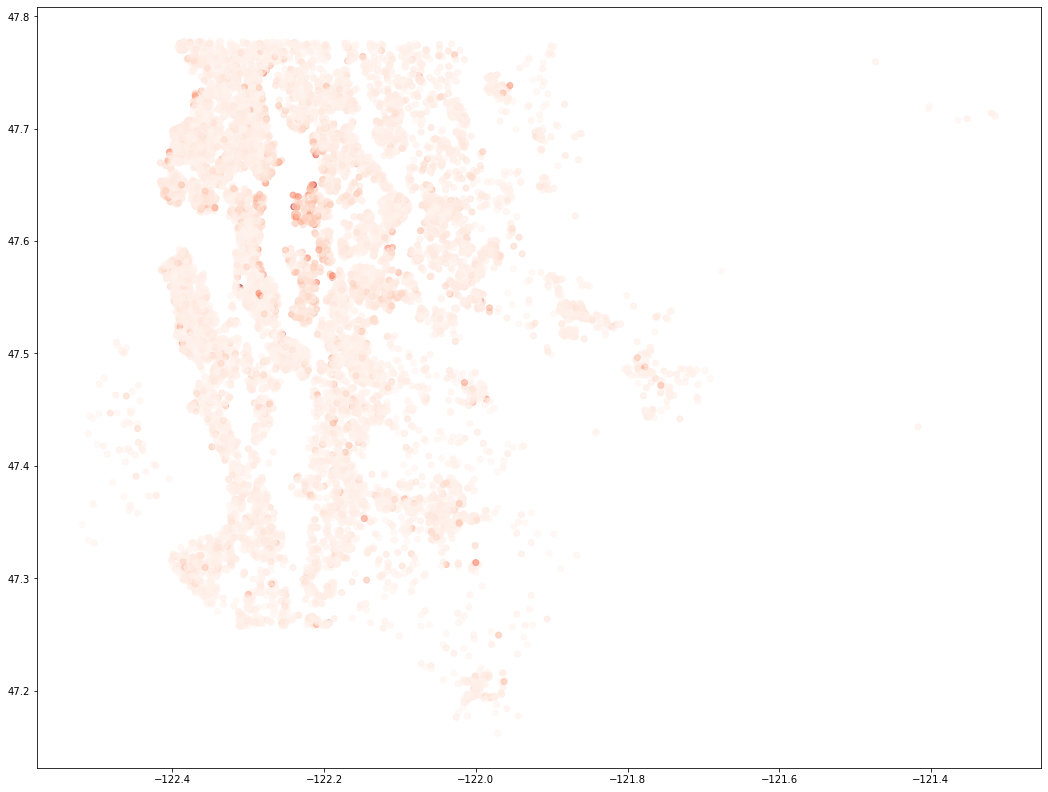

In [425]:
fig, ax = plt.subplots(figsize=(18,14))
ax.scatter('long', 'lat', data=forest_map_df, alpha=0.5, c='abs_residual', cmap='Reds')

<AxesSubplot:>

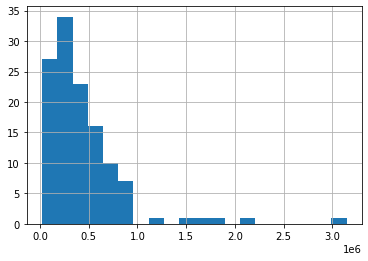

In [431]:
forest_map_df.loc[forest_map_df['price'] < 150000, 'abs_residual'].hist(bins=20)

In [434]:
forest_map_df.rename(columns={'long':'lon'}).to_pickle('./data/forest_pred_map_df.pkl')